<a href="https://colab.research.google.com/github/SiiHyunn/DipLearning_2021/blob/main/Assignment02_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

count    6497.000000
mean       10.491801
std         1.192712
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: alcohol, dtype: float64
9.500000     367
9.400000     332
9.200000     271
10.000000    229
10.500000    227
            ... 
9.233333       1
12.333333      1
13.133333      1
11.466667      1
11.550000      1
Name: alcohol, Length: 111, dtype: int64


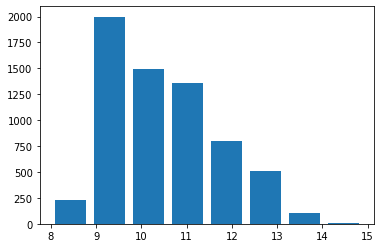

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
red['type'] = 0
white['type'] = 1
wine = pd.concat([red, white])
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
wine_shuffle = wine_norm.sample(frac=1)
wine_np = wine_shuffle.to_numpy()
print(wine['alcohol'].describe())
print(wine['alcohol'].value_counts())

plt.hist(wine['alcohol'], bins=8, rwidth=0.8)
plt.show()

In [ ]:
wine.loc[wine['alcohol'] <= 9.5, 'new_alcohol'] = 0
wine.loc[(wine['alcohol'] >9.5) & (wine['alcohol'] <=11), 'new_alcohol'] = 1
wine.loc[wine['alcohol'] > 11, 'new_alcohol'] = 2

print(wine['new_alcohol'].describe())
print(wine['new_alcohol'].value_counts())

del wine['alcohol']

count    6497.000000
mean        1.014930
std         0.768807
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: new_alcohol, dtype: float64
1.0    2656
2.0    1969
0.0    1872
Name: new_alcohol, dtype: int64


In [ ]:
wine_backup = wine.copy()
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
wine_norm['new_alcohol'] = wine_backup['new_alcohol']
wine_shuffle = wine_norm.sample(frac=1)
wine_np = wine_shuffle.to_numpy()

train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=3)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=3)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.003), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_X, train_Y, epochs=20, batch_size=32, validation_split=0.25)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
122/122 [==============================] - 1s 4ms/step - loss: 0.9360 - accuracy: 0.5248 - val_loss: 0.7829 - val_accuracy: 0.6308
Epoch 2/20
122/122 [==============================] - 0s 2ms/step - loss: 0.7451 - accuracy: 0.6577 - val_loss: 0.6981 - val_accuracy: 0.6631
Epoch 3/20
122/122 [==============================] - 0s 2ms/step - loss: 0.6661 - accuracy: 0.6975 - val_loss: 0.6732 - val_accuracy: 0.6762
Epoch 4/20
122/122 [==============================] - 0s 3ms/step - loss: 0.6076 - accuracy: 0.7218 - val_loss: 0.5929 - val_accuracy: 0.7108
Epoch 5/20
122/122 [==============================] - 0s 2ms/step - loss: 0.5522 - accuracy: 0.7511 - val_loss: 0.5743 - val_accuracy: 0.7377
Epoch 6/20
122/122 [==============================] - 0s 2ms/step - loss: 0.5061 - accuracy: 0.7793 - val_loss: 0.4945 - val_accuracy: 0.7808
Epoch 7/20
122/122 [==============================] - 0s 2ms/step - loss: 0.4744 - accuracy: 0.7909 - val_loss: 0.4564 - val_accuracy: 0.7985
Epoch 

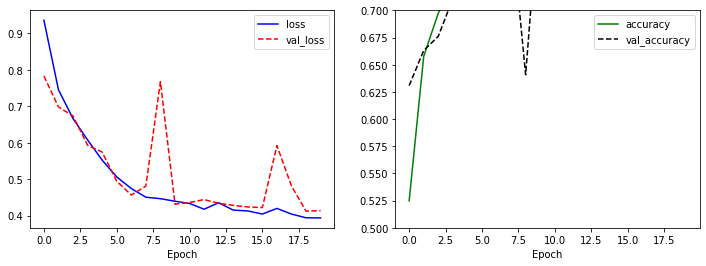

41/41 [==============================] - 0s 1ms/step - loss: 0.4448 - accuracy: 0.8077


[0.4447724223136902, 0.807692289352417]

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.5, 0.7)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y)